<a href="https://colab.research.google.com/github/HeddarM/hello_world/blob/master/train_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# TP : **Exemple d'apprentissage supervisé :  créer un réseau de neurons qui apprendra à réaliser l'opération simulant le comportement de l'opérateur "XOR"**

### **Spécifications : **
Notre "opérateur XOR doit avoir :

*   2 entrées
*   1 sortie  (obéit à la table de vérité de fonction XOR)


1) Créer les vecteurs contenants des données d'entrée et de sortie

Le résultat doit être sous forme :

X= [[0. 0.]
    [0. 1.]
    [1. 0.]
    [1. 1.]]

Y= [0. 1. 1. 0.]

X est de type float32

In [72]:
# On va créer les données d'entrée et de sortie pour apprentissage
import numpy as np

X = np.array([[0., 0.],
              [0., 1.],
              [1., 0.],
              [1., 1.]], dtype=np.float32) # entrées sont flottant
Y = np.array([0., 1., 1., 0.], dtype=np.float32) # façon simple de faire un XOR

print("Valeurs numériques de x et y")
print ("X=",X)
print ("Y=",Y)

Valeurs numériques de x et y
X= [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Y= [0. 1. 1. 0.]


2) Visualiser les données utilisées pour apprentissage sous forme de "nuage de points". Cela permet de mieux voir quelle séparation de data nous attendons du réseau.

Voici l'exemple :

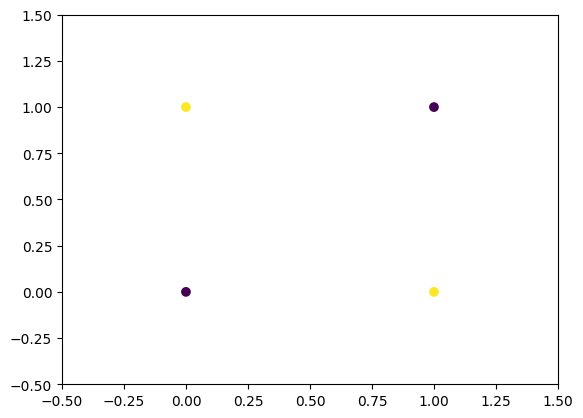

---



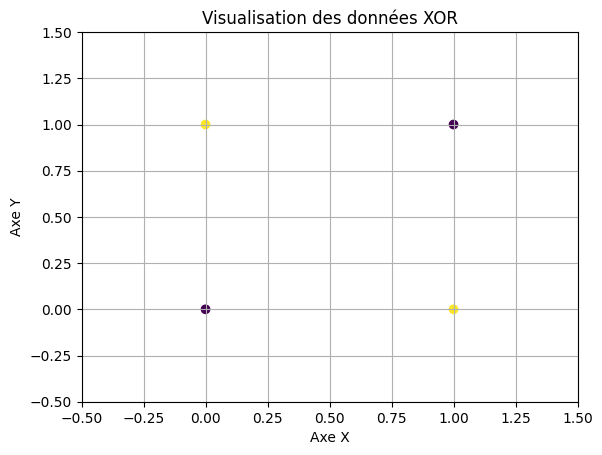

In [73]:
from matplotlib import pyplot as plt
# utiliser scatter et axis - fonction de visualisation des donnée de matplotlib
# Affichage des points avec coloration selon la sortie Y
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.viridis)


# Fixer les axes pour une meilleure lecture
plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.title("Visualisation des données XOR")
plt.xlabel("Axe X")
plt.ylabel("Axe Y")
plt.grid(True)
plt.show()

3) ✋ On n'a pas assez de données pour entrainer. On prépare une "augmentation de données" en créant des vecteurs d'entrée plus grands et en intégrant un peu de "bruit"

Objectif est d'obtenir un nuage de points comme ilustré ci-dessous 🇰
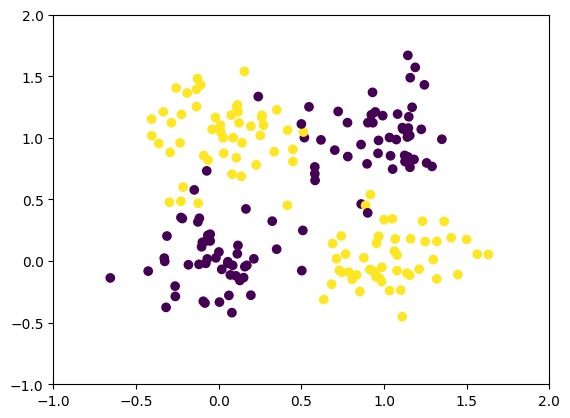

👆 Pour ceci, on va utiliser les fonctions suivantes
np.tile # copie les éléments de vecteurs n-fois pour augmenter sa taille

Pour générer le "bruit" :
t1 =np.array( 0. + 0.25 * np.random.randn(4*n, 1))
t2 =np.array( 0. + 0.25 * np.random.randn(4*n, 1))


 + affichage

(2000, 2)
(2000,)


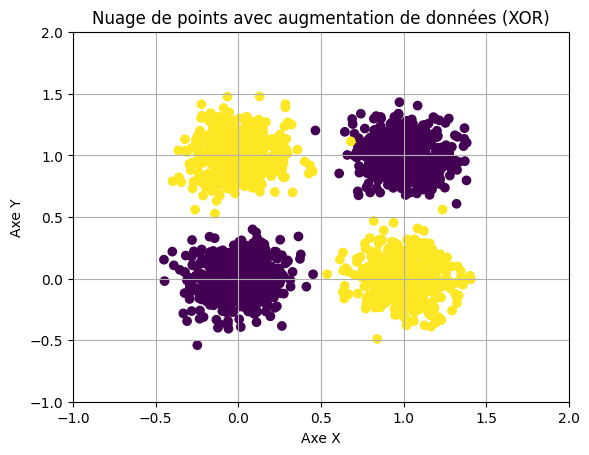

In [99]:
n = 500 # on va commencer avec un petit nombre, puis faire un test avec plus grand.

X = np.array([[0., 0.],
              [0., 1.],
              [1., 0.],
              [1., 1.]], dtype=np.float32) # entrées sont flottant
Y = np.array([0., 1., 1., 0.], dtype=np.float32) # façon simple de faire un XOR

# Répéter les données n fois
Xr = np.tile(X, (n, 1))
Yr = np.multiply(Xr[:,0] != Xr[:,1],1.0)

print (Xr.shape)
print (Yr.shape)

# Ajouter du bruit (bruit gaussien autour des points initiaux)
t1 =np.array (0.15 * np.random.randn(4 * n, 1))
t2 =np.array (0.15 * np.random.randn(4 * n, 1))
X_noisy = Xr + np.hstack([t1,t2])

# Affichage
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=Yr)
plt.axis([-1, 2, -1, 2])
plt.title("Nuage de points avec augmentation de données (XOR)")
plt.xlabel("Axe X")
plt.ylabel("Axe Y")
plt.grid(True)
plt.show()


4) ❓
Etes - vous prêt pour apprendre ?

👌 Commençons par préparer vérifier les formats des données (codage one-hot)

Vous devez obtenir :
0.0
[1. 0.]
[1. 0.]

In [75]:
# on fait import de la librairie KERAS from tensorflow qui nous permettra de coder le réseau et manipuler les données d'apprentissage
# on doit convertir la sortie en format attendu pas l'apprentissage (one-hot)
from tensorflow import keras

d = keras.utils.to_categorical(Y,num_classes=2)
ds = keras.utils.to_categorical(Yr, num_classes=2)
print (Yr[0])
print (d[0])
print (ds[0])

0.0
[1. 0.]
[1. 0.]


5) Séparer les data d'entrée/sortie en partie "entrainement" et "test"
Utilisez la fonction train_test_split

In [81]:
from sklearn.model_selection import train_test_split #sklearn est une librairie très utiles - gardez-la en mémoire
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X_noisy, ds, test_size=0.2)

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1600, 2) (400, 2) (1600, 2) (400, 2)


______________________________________________________________
6) ⚠ ✅
C'est ici que l'on crée notre modèle du réseau
- séquentiel
couche d'entrée
2 couches denses cachées avec RELU
1 couche dense avec sigmoid

model.compile avec les paramètres ::
Optimiseur Adam
Loss categorical_crossentropy
Metrics = accuracy
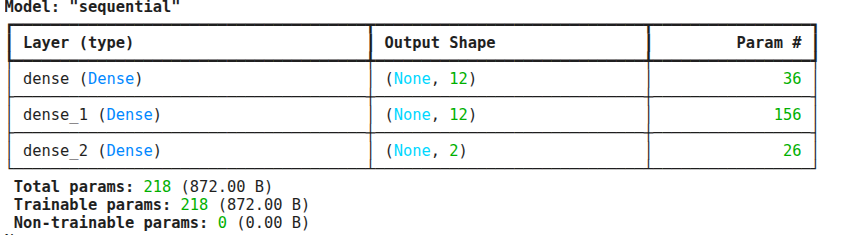


In [84]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(keras.Input(shape=(2,)))
model.add(keras.layers.Dense(12,activation=keras.activations.relu))
model.add(keras.layers.Dense(12,activation=keras.activations.relu))
model.add(keras.layers.Dense(2,activation=keras.activations.sigmoid))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())
print(model.optimizer.get_config())
print(model.get_weights())





Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218 (872.00 B)

 Trainable params: 218 (872.00 B)

 Non-trainable params: 0 (0.00 B)

None
{'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
[array([[ 0.16684544, -0.04651463, -0.5913323 ,  0.37945735, -0.40009364,
         0.04763484, -0.46343434,  0.4602356 , -0.24539492, -0.223816  ,
        -0.5060993 ,  0.47726977],
       [ 0.19242239,  0.4301337 , -0.58523136, -0.2905075 ,  0.41583884,
         0.2391184 ,  0.531124  , -0.48958117, -0.14110368,  0.5865874 ,
        -0.16837272, -0.39276248]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[-3.82319212e-01,  4.08009648e-01, -3.99147272e-02,
         2.23316193e-01, -3.44278336e-01, -4.59649801e-01,
        -3.20469260e-01, -2.73789763e-01, -2.35614896e-01,
         5.74897528e

7)  Lançons entrainement
model.fit

récupérer "history" d'entraimenet pour visualiser le déroulement de l'apprentissage



Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9593 - loss: 0.1090
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9668 - loss: 0.0908
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9700 - loss: 0.0987
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9569 - loss: 0.1110
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9616 - loss: 0.1147
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9569 - loss: 0.1136
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9574 - loss: 0.1182
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9594 - loss: 0.1105
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9600 - loss: 0.1177
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9538 - loss: 0.1215
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.1029
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656 (2.57 KB)

 Trainable params: 218 (872.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 438 (1.71 KB)

None


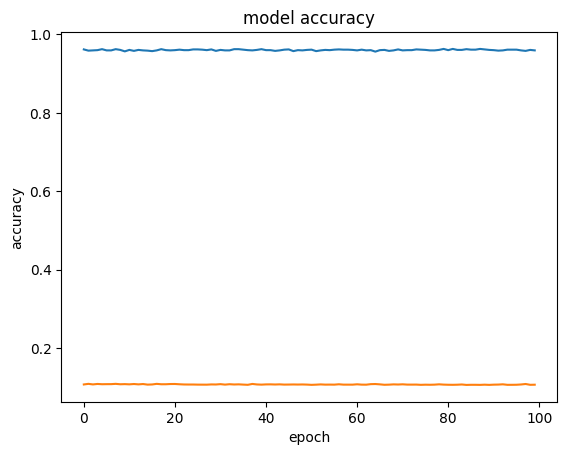

In [87]:

history = model.fit(X_train, y_train, epochs=100, verbose=1)
#history = model.fit(X_train, y_train, epochs=500, verbose=1)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
print(model.summary())

8) Tracer une matrice de confusion en utilisant la partie des données "test"
Aide :  pensez à utiliser np.argmax pour choisir les bonnes prédictions
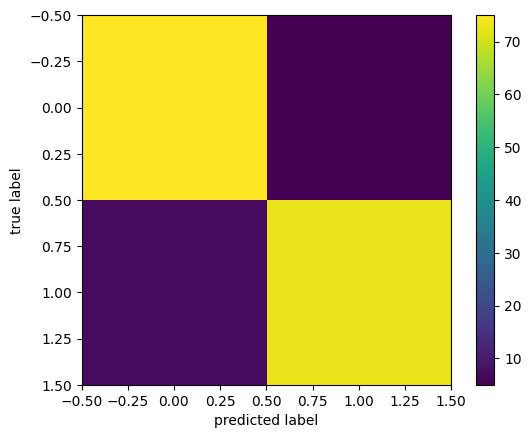

utilisez model.predict

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


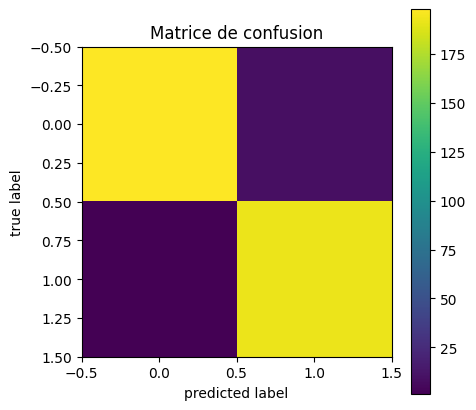

In [89]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(5, 5))
plt.imshow(cm, cmap='viridis')
plt.colorbar()
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title("Matrice de confusion")
plt.show()

9) On va maintenant tracer les résultat superposé sur notre nuage de points.
On prépare d'abord l'espace pour tracer des lignes séparatrices des classes

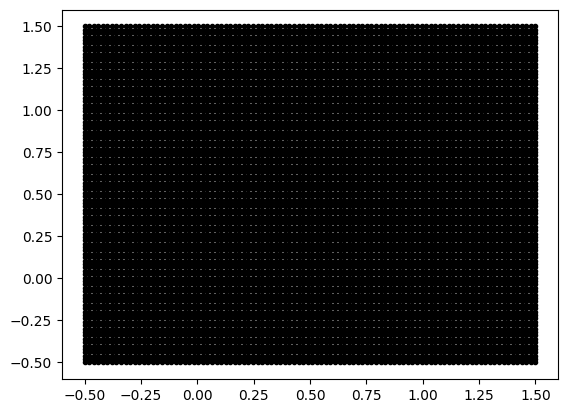

In [90]:
n = 100
nx, ny = (n, n)

x = np.linspace(-0.5, 1.5, nx)
y = np.linspace(-0.5, 1.5, ny)
xv, yv = np.meshgrid(x, y)

plt.plot(xv, yv, marker='.', color='k', linestyle='none')
plt.show()

Exemple de superposition
Question 1 : Testez des modèles NN différent pour observer le comportement de la séparation des classes
Question 2 : Testez des différentes tailles des données et l'accuracy de l'apprentissage.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


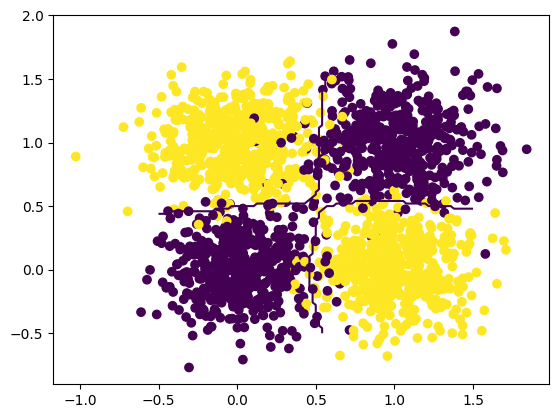

In [93]:
xvf = np.reshape(xv,(n*n,1))
yvf = np.reshape(yv,(n*n,1))

xx = np.concatenate((xvf,yvf),axis=1)
results= model.predict(xx)
yhat=np.argmax(results, axis=1)
yhat = np.reshape(yhat,(n,n))
plt.scatter (X_noisy[:,0],X_noisy[:,1],c=Yr)
yhat.shape
cs = plt.contour(xv,yv,yhat,[0.5])
